In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
mean, covariance = [5,12], [[1,-.75],[-.75,1]]
n = 50
samples = np.random.multivariate_normal(mean,covariance, n)

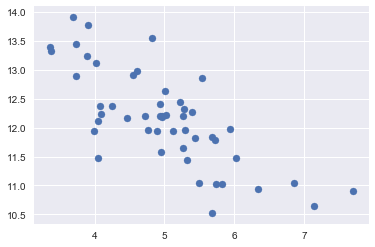

In [3]:
plt.scatter(x=samples[:,0], y=samples[:,1])


In [4]:
X = np.array(samples[:,0])
y = np.array(samples[:,1])


In [5]:
intercept = np.ones(len(X))
X = np.column_stack((intercept, X))

In [6]:

# Closed form solution -> x-hat = (X'X)^-1*X'*y
Xt = np.transpose(X)
X_sym = np.dot(Xt, X)
inverse = np.linalg.inv(X_sym)

# Solution (X*X')^-1 * X' * y
x_hat = np.dot(np.dot(inverse, Xt), y)

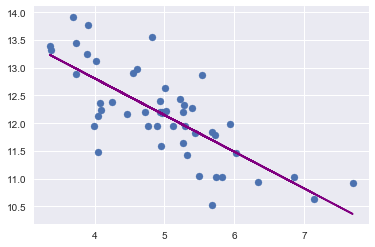

In [7]:
plt.scatter(x=samples[:,0], y=samples[:,1])
plt.plot(X[:,1], np.dot(X,x_hat), color = 'purple')

In [8]:
# Gradient Descent Method


# initialize weights
weights = np.array(np.random.random(X.shape[1]))

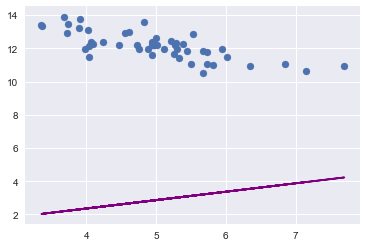

In [9]:
plt.scatter(x=samples[:,0], y=samples[:,1])
plt.plot(X[:,1], np.dot(X,weights), color = 'purple')

In [10]:
n, m = X.shape
weights = np.array(np.random.random(m))



In [11]:
def gradient_descent(X, y, n, weights, alpha):
    
    weights_over_time = []
    error_over_time = []
    grad_norm = 1
    while grad_norm > 0.001: 
        # Current estimation of y using linear regression model 
        predictions = X.dot(weights)
        
        # Current errors (loss) of the model for each data point
        errors = predictions - y
        
        # Mean Squared Error, or average error across entire dataset (this is a typical model evaluation metric)
        mse = (1/n)*np.sum(errors**2)
        error_over_time.append(mse)
        
        # Compute gradient vector
        gradients = np.dot(X.transpose(), errors) * (1/n)
        
        # Calculate the norm of the gradient vector 
        grad_norm = np.linalg.norm(gradients)
        
        # Change weights according to gradients and learning rate (alpha)
        weights = weights - (alpha * gradients)
        
        # Calculate the new MSE
        new_mse = (1/n)*np.sum((X.dot(weights)-y)**2)
        weights_over_time.append(weights)
        
        # Checks whether the algorithm is diverging. If the error is rising, the learning rate it too high
        if new_mse > mse:
            print("ERROR: Gradient descent is diverging. Please lower the learning rate (alpha).")
            break
    return (weights_over_time, error_over_time)

In [12]:
result = gradient_descent(X, y, n, weights, 0.03)


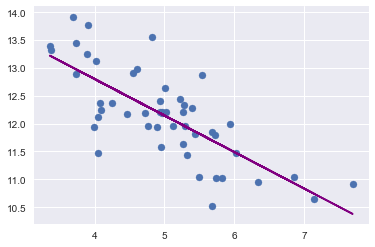

In [13]:
new_weights = result[0][-1]
plt.scatter(x=samples[:,0], y=samples[:,1])
plt.plot(X[:,1], np.dot(X,new_weights), color = 'purple')


In [14]:
print("Model Fit After Gradient Descent: \n\n", 
      "Number of Epochs: %d\n" %len(result[0]), 
      "MSE of model: %f\n" %result[1][-1], 
      "Final Weights: %s \n" %result[0][-1])

Model Fit After Gradient Descent: 

 Number of Epochs: 6427
 MSE of model: 0.282827
 Final Weights: [ 15.41888285  -0.65464157] 



(0, 10)

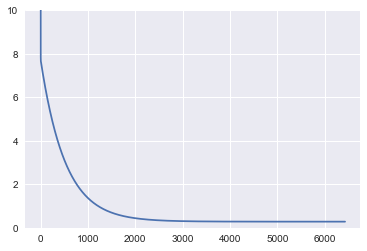

In [15]:
plt.plot(result[1])
plt.ylim((0,10))